In [67]:
# importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [68]:
# Loading the datasets
df = pd.read_csv("/content/order_details.csv")
df1 = pd.read_csv("/content/orders.csv")
df2 = pd.read_csv("/content/pizza_types.csv", encoding = "latin1" )
df3 = pd.read_csv("/content/pizzas.csv")

In [69]:
# Merging the datasets
data = pd.merge(df, df1, on="order_id", how="outer", validate="many_to_one")
data = pd.merge(data, df3, on="pizza_id", how="outer")
data = pd.merge(data, df2, on="pizza_type_id", how="outer")
data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,26.0,11.0,bbq_ckn_l,1.0,2015-01-01,13:02:59,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,43.0,17.0,bbq_ckn_l,1.0,2015-01-01,13:53:00,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,71.0,27.0,bbq_ckn_l,1.0,2015-01-01,15:11:17,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,83.0,33.0,bbq_ckn_l,1.0,2015-01-01,15:54:08,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
4,123.0,51.0,bbq_ckn_l,1.0,2015-01-01,18:48:28,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [70]:
data.tail()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
48620,48406.0,21251.0,veggie_veg_s,2.0,2015-12-30,12:45:20,veggie_veg,S,12.0,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48621,48493.0,21296.0,veggie_veg_s,1.0,2015-12-31,15:13:40,veggie_veg,S,12.0,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48622,48500.0,21298.0,veggie_veg_s,1.0,2015-12-31,15:35:37,veggie_veg,S,12.0,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48623,48503.0,21299.0,veggie_veg_s,1.0,2015-12-31,15:52:16,veggie_veg,S,12.0,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
48624,48553.0,21319.0,veggie_veg_s,1.0,2015-12-31,18:07:19,veggie_veg,S,12.0,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [71]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  float64
 1   order_id          48620 non-null  float64
 2   pizza_id          48625 non-null  object 
 3   quantity          48620 non-null  float64
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48625 non-null  object 
 7   size              48625 non-null  object 
 8   price             48625 non-null  float64
 9   name              48625 non-null  object 
 10  category          48625 non-null  object 
 11  ingredients       48625 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [72]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [73]:
# check missing values
data.isnull().sum()

,0
order_details_id,5
order_id,5
pizza_id,0
quantity,5
date,5
time,5
pizza_type_id,0
size,0
price,0
name,0


In [74]:
# Remove missing value, because it's (MCAR)
data.dropna(inplace=True)

In [75]:
# total revenue per sales
data['total_price'] = data['quantity'] * data['price']
total_revenue = data['total_price'].sum()
print(f"The total revenue per sales is: ₦{total_revenue:,.2f}")

The total revenue per sales is: ₦817,860.05


In [76]:
# Total quantity sold
total_sales = data['quantity'].sum()
print(f"The total quantity sold is: {total_sales:,.0f}")

The total quantity sold is: 49,574


In [77]:
# Total order
total_orders = data['order_id'].nunique()
print(f"The total number of orders is: {total_orders:,.0f}")

The total number of orders is: 21,350


In [78]:
# Number of pizza types sold
pizza_types = data['pizza_type_id'].nunique()
print(f"The total number of pizza types sold is: {pizza_types:,.0f}")

The total number of pizza types sold is: 32


In [79]:
# Average price of the pizzas
average_price = data['price'].mean()
print(f"The average price of the pizzas is: ₦{average_price:,.2f}")

The average price of the pizzas is: ₦16.49


In [80]:
# The peak hours of sales
data['order_time'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['hours'] = data['order_time'].dt.hour
peak_hours = data['hours'].value_counts().sort_index()
print("The peak hours of sales are:", peak_hours)

The peak hours of sales are: hours
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


In [81]:
# Total sales per day of the week
data['day_of_week'] = data['order_time'].dt.day_name()
daily_sales = data.groupby('day_of_week')['total_price'].sum().sort_values(ascending=False)
print("Total sales per day of the week:\n", daily_sales)

most_sales_day = daily_sales.index[0]
max_sales_amount = daily_sales.iloc[0]
print(f"The day of the week with the most sales is {most_sales_day} with total sales of ₦{max_sales_amount:,.2f}")

Total sales per day of the week:
 day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64
The day of the week with the most sales is Friday with total sales of ₦136,073.90


In [82]:
# The top 5 bestselling pizzas
top_5_pizzas = data.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)
print("The top 5 bestselling pizza types are:\n", top_5_pizzas)

The top 5 bestselling pizza types are:
 pizza_type_id
classic_dlx    2453.0
bbq_ckn        2432.0
hawaiian       2422.0
pepperoni      2418.0
thai_ckn       2371.0
Name: quantity, dtype: float64


In [83]:
# Total sales per month
data['month'] = data['order_time'].dt.month
monthly_sales = data.groupby('month')['total_price'].sum().sort_index()
print("Total sales per month:\n", monthly_sales)

Total sales per month:
 month
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: total_price, dtype: float64


In [84]:
# The worst performing pizzas
worst_performing_pizzas = data.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=True).head(5)
print("The 5 worst performing pizza types are:\n", worst_performing_pizzas)

The 5 worst performing pizza types are:
 pizza_type_id
brie_carre      490.0
mediterraneo    934.0
calabrese       937.0
spinach_supr    950.0
soppressata     961.0
Name: quantity, dtype: float64


In [85]:
# Total Revenue by Pizza Category
revenue_by_category = data.groupby('category')['total_price'].sum()

print("Total revenue per pizza category:\n", revenue_by_category.sort_values(ascending=False))
print("\nTop performing categories:\n", revenue_by_category.sort_values(ascending=False).head())
print("\nBottom performing categories:\n", revenue_by_category.sort_values(ascending=True).head())

Total revenue per pizza category:
 category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64

Top performing categories:
 category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64

Bottom performing categories:
 category
Veggie     193690.45
Chicken    195919.50
Supreme    208197.00
Classic    220053.10
Name: total_price, dtype: float64


In [86]:
# Total Revenue by Pizza Type
revenue_by_pizza_type = data.groupby('pizza_type_id')['total_price'].sum()

print("Total revenue per pizza type:\n", revenue_by_pizza_type.sort_values(ascending=False))
print("\nTop performing pizza types:\n", revenue_by_pizza_type.sort_values(ascending=False).head())
print("\nBottom performing pizza types:\n", revenue_by_pizza_type.sort_values(ascending=True).head())

Total revenue per pizza type:
 pizza_type_id
thai_ckn        43434.25
bbq_ckn         42768.00
cali_ckn        41409.50
classic_dlx     38180.50
spicy_ital      34831.25
southw_ckn      34705.75
ital_supr       33476.75
hawaiian        32273.25
four_cheese     32265.70
sicilian        30940.50
pepperoni       30161.75
the_greek       28454.10
mexicana        26780.75
five_cheese     26066.50
peppr_salami    25529.00
ital_cpcllo     25094.00
veggie_veg      24374.75
prsc_argla      24193.25
napolitana      24087.00
spinach_fet     23271.25
big_meat        22968.00
pep_msh_pep     18834.50
ckn_alfredo     16900.25
ckn_pesto       16701.75
soppressata     16425.75
ital_veggie     16019.25
calabrese       15934.25
spin_pesto      15596.00
mediterraneo    15360.50
spinach_supr    15277.75
green_garden    13955.75
brie_carre      11588.50
Name: total_price, dtype: float64

Top performing pizza types:
 pizza_type_id
thai_ckn       43434.25
bbq_ckn        42768.00
cali_ckn       41409.50
class

In [87]:
# Total revenue per pizza size
revenue_by_size = data.groupby('size')['total_price'].sum()

print("Total revenue per pizza size:\n", revenue_by_size.sort_values(ascending=False))
print("\nTop performing pizza sizes:\n", revenue_by_size.sort_values(ascending=False).head())
print("\nBottom performing pizza sizes:\n", revenue_by_size.sort_values(ascending=True).head())

Total revenue per pizza size:
 size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

Top performing pizza sizes:
 size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

Bottom performing pizza sizes:
 size
XXL      1006.60
XL      14076.00
S      178076.50
M      249382.25
L      375318.70
Name: total_price, dtype: float64


In [88]:
# The average order value
average_order_value = total_revenue / total_orders
print(f"The average order value is: {average_order_value:,.2f}")

The average order value is: 38.31


# **Visualisations and Insights**

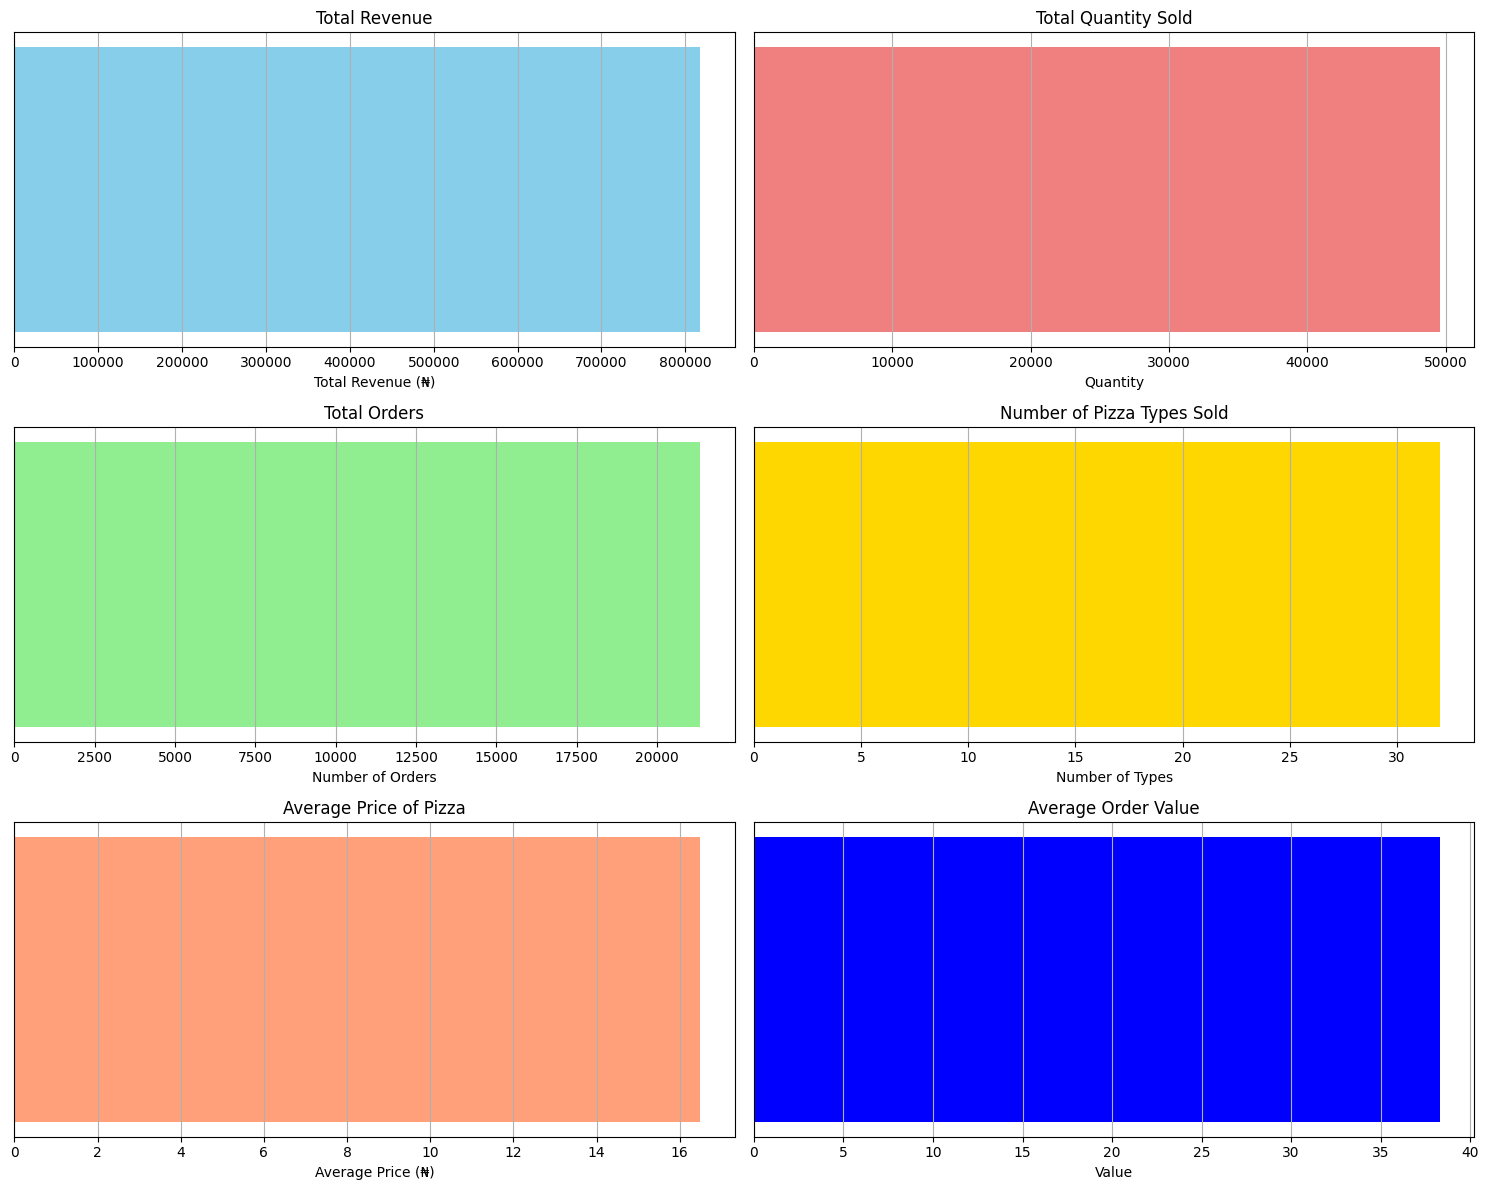

In [89]:
# Combine Chart
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

# Subplot 1: Total Revenue
ax[0,0].barh('Total Revenue', total_revenue, color='skyblue')
ax[0,0].set_title('Total Revenue')
ax[0,0].set_xlabel('Total Revenue (₦)')
ax[0,0].set_yticks([]) # Remove the y-axis tick label
ax[0,0].grid(True)

# Subplot 2: Total Quantity Sold
ax[0,1].barh('Total Quantity Sold', total_sales, color='lightcoral')
ax[0,1].set_title('Total Quantity Sold')
ax[0,1].set_xlabel('Quantity')
ax[0,1].set_yticks([]) # Remove the y-axis tick label
ax[0,1].grid(True)

# Subplot 3: Total Orders
ax[1,0].barh('Total Orders', total_orders, color='lightgreen')
ax[1,0].set_title('Total Orders')
ax[1,0].set_xlabel('Number of Orders')
ax[1,0].set_yticks([]) # Remove the y-axis tick label
ax[1,0].grid(True)

# Subplot 4: Number of Pizza Types Sold
ax[1,1].barh('Number of Pizza Types Sold', pizza_types, color='gold')
ax[1,1].set_title('Number of Pizza Types Sold')
ax[1,1].set_xlabel('Number of Types')
ax[1,1].set_yticks([]) # Remove the y-axis tick label
ax[1,1].grid(True)

# Subplot 5: Average Pizza Price
ax[2,0].barh('Average Price', average_price, color='lightsalmon')
ax[2,0].set_title('Average Price of Pizza')
ax[2,0].set_xlabel('Average Price (₦)')
ax[2,0].set_yticks([]) # Remove the y-axis tick label
ax[2,0].grid(True)

# Subplot 6: Average Order Value
ax[2,1].barh('Average Order Value', average_order_value, color='blue')
ax[2,1].set_title('Average Order Value')
ax[2,1].set_yticks([]) # Remove the y-axis tick label
ax[2,1].set_xlabel('Value')
ax[2,1].grid(True)

plt.tight_layout()
plt.show()

# **Key insights from combine chart and pizza sales data:**

- **Total Revenue:** Over ₦817,000 in total earnings means the pizza business is doing really well.

- **Total Quantity Sold:** With nearly 50,000 pizzas sold, it shows a strong demand for the product.

- **Total Orders:** Processing over 21,000 orders indicates a consistent flow of customers.

- **Number of Pizza Types Sold:** Offering 32 different pizza types suggests a rich menu that likely attracts a broad customer base.

- **Average Pizza Price:** An average price of around ₦16.50 per pizza helps in understanding the general pricing tier.

- **Average Order Value:** Customers spend about ₦38.30 on average per order, which is a solid base for individual transactions.



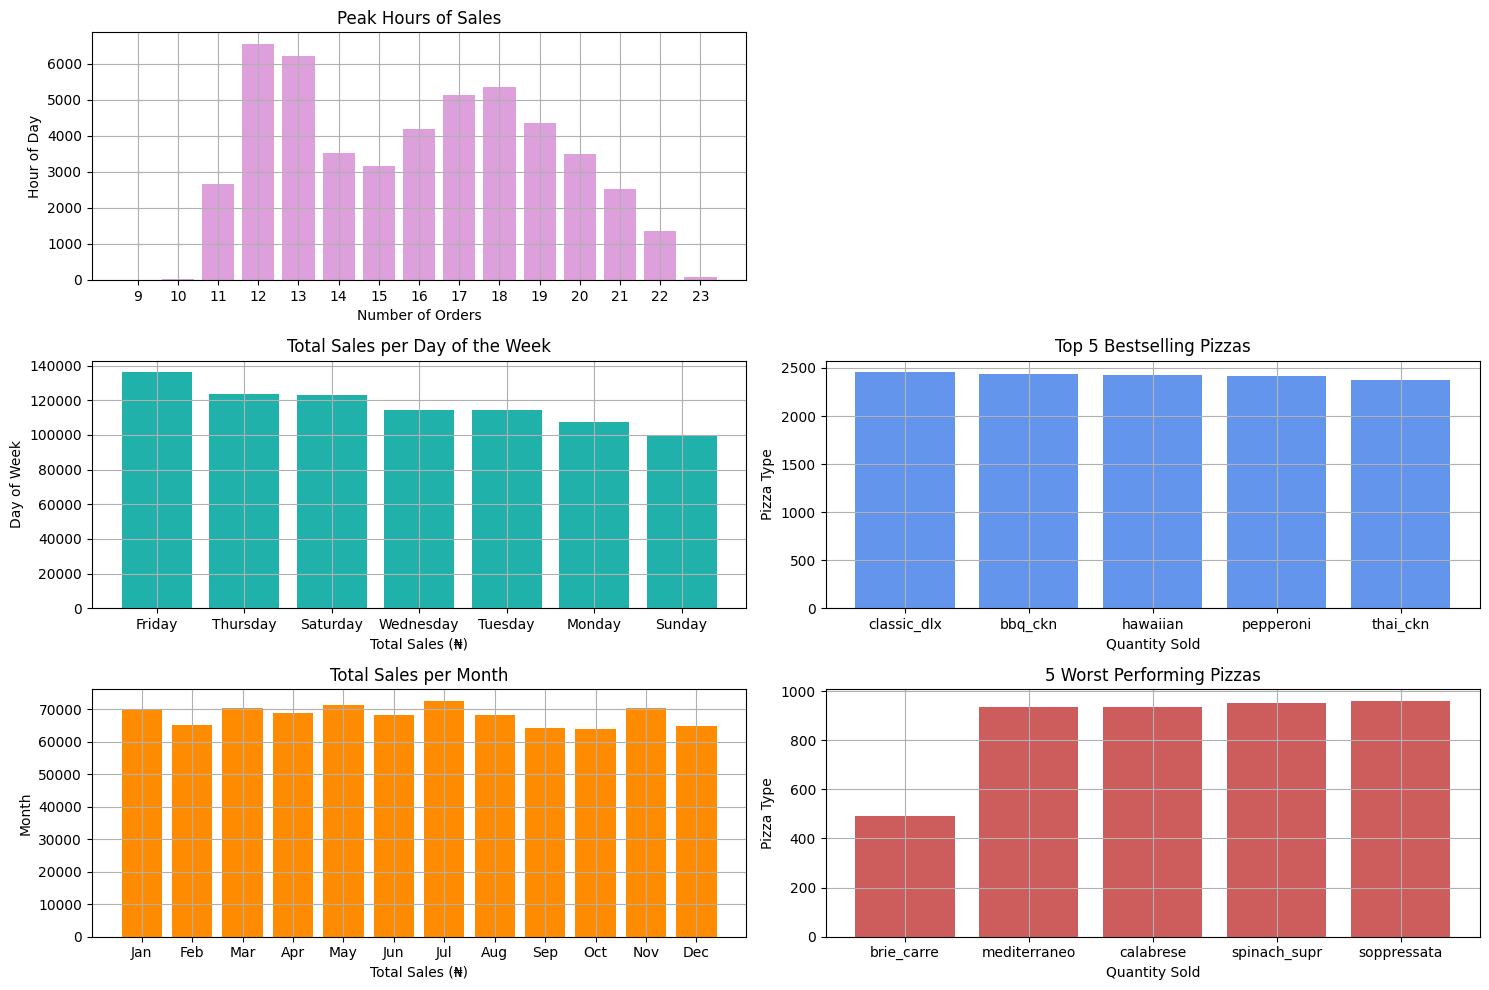

In [90]:
# Combine Chart
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

# Subplot 1: Peak Hours of Sales
ax[0, 0].bar(peak_hours.index.astype(str), peak_hours.values, color='plum')
ax[0, 0].set_title('Peak Hours of Sales')
ax[0, 0].set_xlabel('Number of Orders')
ax[0, 0].set_ylabel('Hour of Day')
ax[0, 0].grid(True)

# Subplot 2: Total Sales per Day of the Week
ax[1, 0].bar(daily_sales.index, daily_sales.values, color='lightseagreen')
ax[1, 0].set_title('Total Sales per Day of the Week')
ax[1, 0].set_xlabel('Total Sales (₦)')
ax[1, 0].set_ylabel('Day of Week')
ax[1, 0].grid(True)

# Subplot 3: Top 5 Bestselling Pizzas
ax[1, 1].bar(top_5_pizzas.index, top_5_pizzas.values, color='cornflowerblue')
ax[1, 1].set_title('Top 5 Bestselling Pizzas')
ax[1, 1].set_xlabel('Quantity Sold')
ax[1, 1].set_ylabel('Pizza Type')
ax[1, 1].grid(True)

# Subplot 4: Total Sales per Month
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax[2, 0].bar(monthly_sales.index.map(lambda x: month_labels[x-1]), monthly_sales.values, color='darkorange')
ax[2, 0].set_title('Total Sales per Month')
ax[2, 0].set_xlabel('Total Sales (₦)')
ax[2, 0].set_ylabel('Month')
ax[2, 0].grid(True)


# Subplot 5: 5 Worst Performing Pizzas
ax[2, 1].bar(worst_performing_pizzas.index, worst_performing_pizzas.values, color='indianred')
ax[2, 1].set_title('5 Worst Performing Pizzas')
ax[2, 1].set_xlabel('Quantity Sold')
ax[2, 1].set_ylabel('Pizza Type')
ax[2, 1].grid(True)

# Remove the unused subplot (ax[0,1])
fig.delaxes(ax[0, 1])

plt.tight_layout()
plt.show()

# **Key insights from combine chart and pizza sales data:**

- **Peak Hours of Sales:** The busiest hours are definitely between 12 PM and 1 PM, followed closely by 5 PM to 7 PM. This is when you see the most orders coming in. Early mornings and late nights are much quieter.

- **Total Sales per Day of the Week:** Fridays are the strongest sales days, bringing in the most revenue. This is followed by Thursdays and Saturdays. Sundays are the slowest days for sales.

- **Top 5 Bestselling Pizzas:** The customers love the Classic Deluxe, BBQ Chicken, Hawaiian, Pepperoni, and Thai Chicken pizzas the most! These are the star performers in terms of quantity sold.

- **Total Sales per Month:** Sales seem fairly consistent throughout the year, with slight fluctuations. July appears to be the highest-grossing month, while September and October are a bit slower.

- **Worst Performing Pizzas:** On the flip side, the Brie Carre, Mediterraneo, Calabrese, Spinach Supreme, and Soppressata pizzas sell the least. These might be areas to re-evaluate or promote differently.

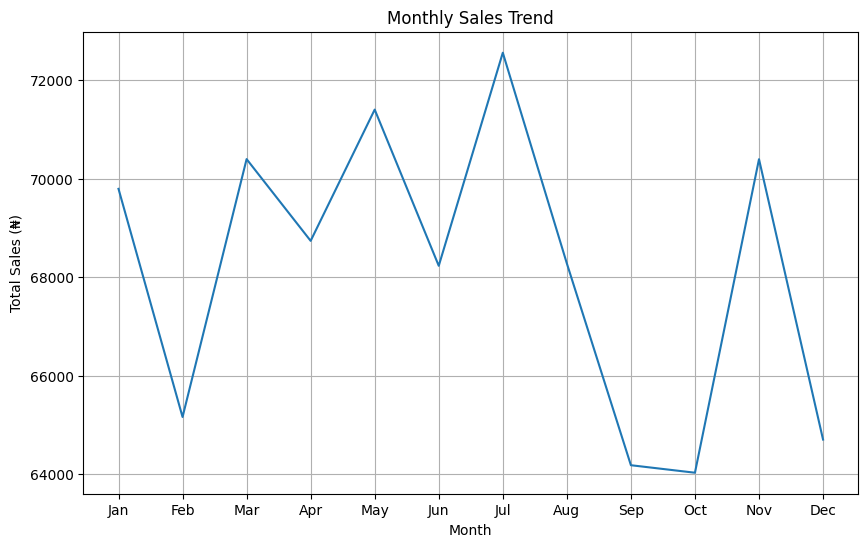

In [91]:
# Monthly Sales Trend Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (₦)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Monthly Sales Trend Chart:**

The sales are pretty consistent throughout the year, but there are some interesting peaks and dips.

- **Higher Sales:** There's slightly better sales in July and May, which are the best months.
- **Stable Periods:** Months like March, April, June, and November also show strong, steady sales.
- **Slight Dips:** There's a small dip in sales during February, September, October, and December. These are the slower months.

So, the trend is quite stable with no huge swings, which is good for planning.

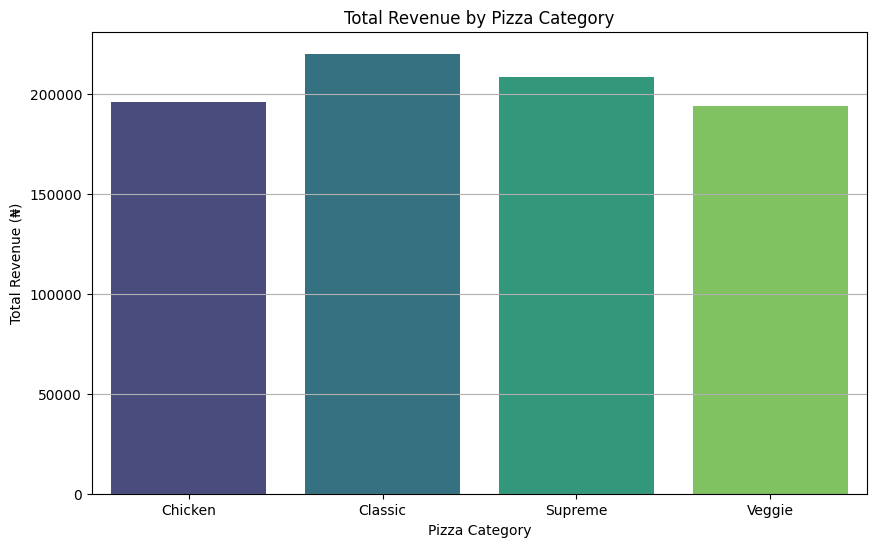

In [92]:
# Chart of total revenue by pizza category
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, hue=revenue_by_category.index, palette='viridis', legend=False)
plt.title('Total Revenue by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Revenue (₦)')
plt.grid(axis='y')
plt.show()

**The revenue generated by each pizza category:**

- **Top Performers:** The Classic category brings in the most revenue, followed closely by Supreme and Chicken pizzas. These are the heavy hitters.

- **Bottom Performer:** The Veggie category, while still contributing significantly, generates the least revenue compared to the others.

Above all, Classic, Supreme, and Chicken pizzas are driving most of the sale.!


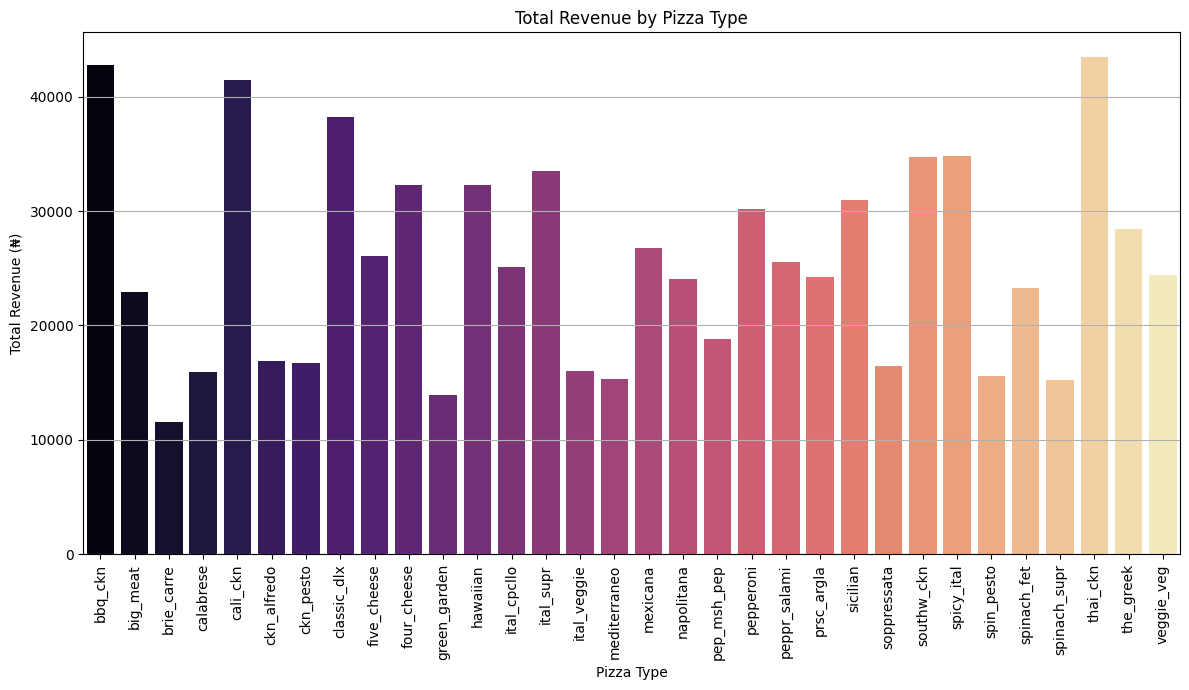

In [93]:
# Total revenue by pizza type
plt.figure(figsize=(12, 7))
sns.barplot(x=revenue_by_pizza_type.index, y=revenue_by_pizza_type.values, hue=revenue_by_pizza_type.index, palette='magma', legend=False)
plt.title('Total Revenue by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Total Revenue (₦)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**The revenue generated by each specific pizza type:**

- **Top Performers:** The pizzas bringing in the most cash are Thai Chicken, BBQ Chicken, and California Chicken. These are the big money-makers.

- **Bottom Performers:** On the other end, Brie Carre, Green Garden, and Spinach Supreme are generating the least revenue. These might need a fresh look or some marketing love.



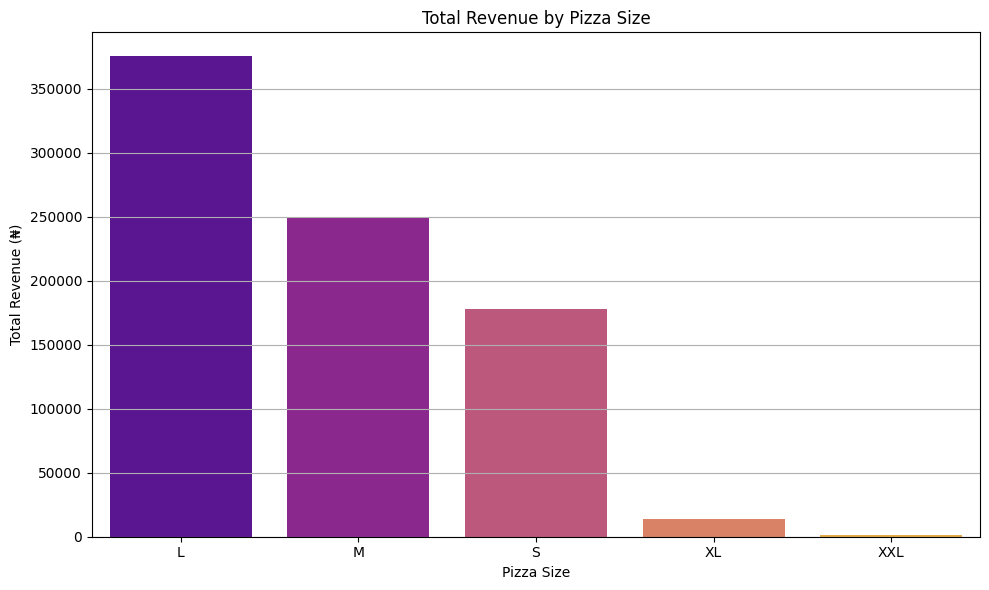

In [94]:
# Total revenue by pizza size
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_size.index, y=revenue_by_size.values, hue=revenue_by_size.index, palette='plasma', legend=False)
plt.title('Total Revenue by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Revenue (₦)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**The revenue generated by pizza size:**

- **Top Performers:** Large (L) pizzas are the biggest money-makers, bringing in significantly more revenue than any other size. Medium (M) and Small (S) also contribute a good amount.

- **Bottom Performers:** The XL and especially XXL sizes generate very little revenue compared to the others. It seems these larger sizes are not very popular.

